## Microsoft Stock Forecasting with LSTM

## Introduction

Stock forecasting is a challenging task that involves forecasting future stock prices based on historical data. As, the future trends depend upon the past data, one effective approach that we are going to use is Long Short-Term Memory (LSTM) neural networks, a type of recurrent neural network (RNN) well-suited for time series data. LSTM models can capture long-term dependencies in stock prices, making them useful for predicting future trends. The process typically involves preparing the data, creating supervised learning samples, and training the LSTM model to predict future prices based on past stock values
Now, let's go through these steps one by one.

The dataset can be downloaded using the following link.

In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# Importing necessary libraries

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

Here, we are going to predict the stocks of Microsoft, and we are using their historical data. We are going to use the data starting from 1st January 2000 till the current date which is 1st August 2024. Let's have a look on the data.

In [ ]:
df = pd.read_csv('/content/MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.000645,53228400
1,2000-01-04,56.781250,58.562500,56.125000,56.312500,34.784523,54119000
2,2000-01-05,55.562500,58.187500,54.687500,56.906250,35.151287,64059600
3,2000-01-06,56.093750,56.937500,54.187500,55.000000,33.973782,54976600
4,2000-01-07,54.312500,56.125000,53.656250,55.718750,34.417767,62013600
...,...,...,...,...,...,...,...
6178,2024-07-25,428.799988,429.799988,417.510010,418.399994,418.399994,29943800
6179,2024-07-26,418.200012,428.920013,417.269989,425.269989,425.269989,23583800
6180,2024-07-29,431.579987,432.149994,424.700012,426.730011,426.730011,15125800
6181,2024-07-30,427.720001,429.049988,417.359985,422.920013,422.920013,32687600


So, we can see that we have 6183 rows and 7 columns. We're going to keep things simple by just using the closing value so we'll have the date and what that value was at the end of that date. We're going to discard the other columns

In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2000-01-03,58.281250
1,2000-01-04,56.312500
2,2000-01-05,56.906250
3,2000-01-06,55.000000
4,2000-01-07,55.718750
...,...,...
6178,2024-07-25,418.399994
6179,2024-07-26,425.269989
6180,2024-07-29,426.730011
6181,2024-07-30,422.920013


Here we do not have the Date feature in the datetime data type, let's look at the data type of the date feature.

In [ ]:
df['Date']

,Date
0,2000-01-03
1,2000-01-04
2,2000-01-05
3,2000-01-06
4,2000-01-07
...,...
6178,2024-07-25
6179,2024-07-26
6180,2024-07-29
6181,2024-07-30


We can see it is an object. We want to convert it into datetime data type. So, let's do that!

In [ ]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2000-01-01')
datetime_object

datetime.datetime(2000, 1, 1, 0, 0)

In [ ]:
df

,Date,Close
0,2000-01-03,58.281250
1,2000-01-04,56.312500
2,2000-01-05,56.906250
3,2000-01-06,55.000000
4,2000-01-07,55.718750
...,...,...
6178,2024-07-25,418.399994
6179,2024-07-26,425.269989
6180,2024-07-29,426.730011
6181,2024-07-30,422.920013


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date
0,2000-01-03
1,2000-01-04
2,2000-01-05
3,2000-01-06
4,2000-01-07
...,...
6178,2024-07-25
6179,2024-07-26
6180,2024-07-29
6181,2024-07-30


Now, we can see the dtype of the 'Date" feature has changed to datetime.
Now let's make that date column the index.

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2000-01-03,58.281250
2000-01-04,56.312500
2000-01-05,56.906250
2000-01-06,55.000000
2000-01-07,55.718750
...,...
2024-07-25,418.399994
2024-07-26,425.269989
2024-07-29,426.730011


Now, we are going to plot our data.

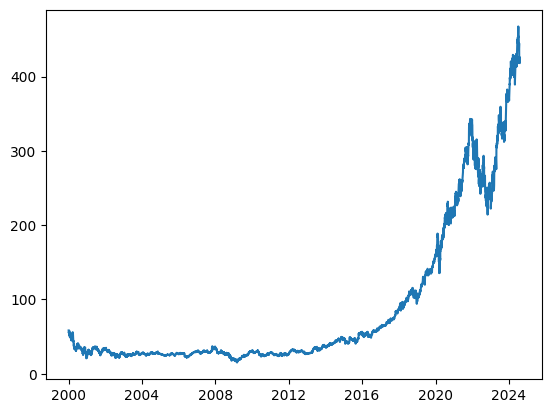

In [ ]:
plt.plot(df.index, df['Close'])

We can see that from 2000 to all the way up until 2022. The stock goes absolutely crazy after it hits about 2016 or so and then there's a little bit of a drop at around 2022 till 2023. And then after 2023, it again goes up crazily.

Now because we're using the lstm model we need to convert this into a supervised learning problem. So, we're going to do this by making a new function and for that, we will define 'df_to_windowed_df'.

In [ ]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2023-08-01'
windowed_df = df_to_windowed_df(df,
                                '2000-08-01',
                                '2024-07-31',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2000-08-01,34.687500,34.843750,34.906250,34.343750
1,2000-08-02,34.843750,34.906250,34.343750,34.687500
2,2000-08-03,34.906250,34.343750,34.687500,35.125000
3,2000-08-04,34.343750,34.687500,35.125000,34.562500
4,2000-08-07,34.687500,35.125000,34.562500,35.000000
...,...,...,...,...,...
6032,2024-07-25,442.940002,444.850006,428.899994,418.399994
6033,2024-07-26,444.850006,428.899994,418.399994,425.269989
6034,2024-07-29,428.899994,418.399994,425.269989,426.730011
6035,2024-07-30,418.399994,425.269989,426.730011,422.920013


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((6037,), (6037, 3, 1), (6037,))

# Training, Testing, and Validation
Let's split the data for training, testing and validation. For that, we will keep the first 80% of the data for training, the next 10% for validation and the last 10% for testing.
We will then plot them.

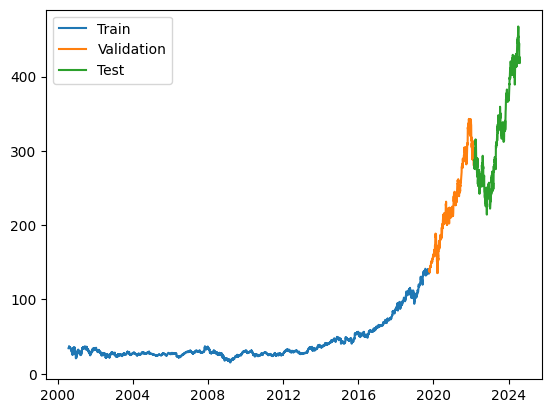

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

# Model Setup
TensorFlow and Keras are used to create a sequential model. So let's import the necessary libraries and build the model. The model consists of an input layer, an LSTM layer with 64 neurons, and dense layers.

We will use relu function as activation function and a learning rate of 0.001.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1989.2654 - mean_absolute_error: 34.9200 - val_loss: 36035.7070 - val_mean_absolute_error: 181.0644
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 165.8722 - mean_absolute_error: 4.8130 - val_loss: 14141.8926 - val_mean_absolute_error: 104.4336
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2333 - mean_absolute_error: 0.7636 - val_loss: 12078.7529 - val_mean_absolute_error: 94.0953
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8694 - mean_absolute_error: 0.5796 - val_loss: 11481.1260 - val_mean_absolute_error: 90.9272
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8757 - mean_absolute_error: 0.5871 - val_loss: 11342.5527 - val_mean_absolute_error: 90.2763
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7302 - mean_absolute_error: 0.5627 - val_loss: 11206.0898 - val_mean_absolute_error: 89.5317
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

It's much easier to visualize what's going on with graphs, so I am just going to show the pretty picture we can make for it, predicting on the training set.  
So, the orange is the actual observed observations, it's what really happened from 2000 to 2024. The blue is what we predicted, so each time it got the three previous and it tried to predict the next one.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


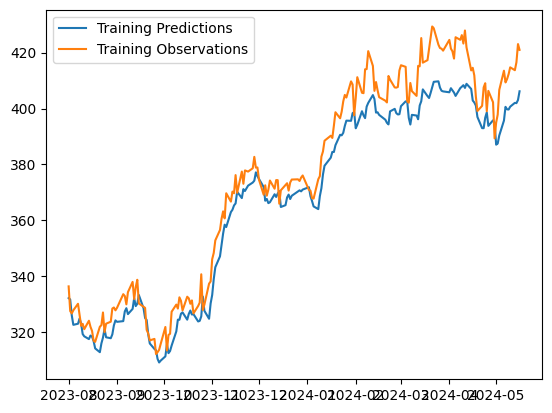

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

As we can see, both of them nearly overlaps with each other.

Now, let's do the same for validation part.

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


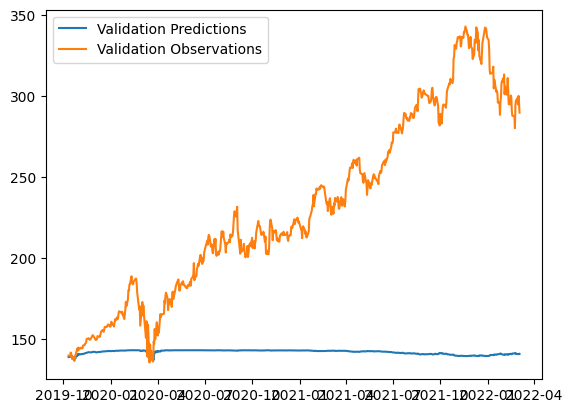

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

So, the model works really bad on the validation part, so we need to improve it.

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


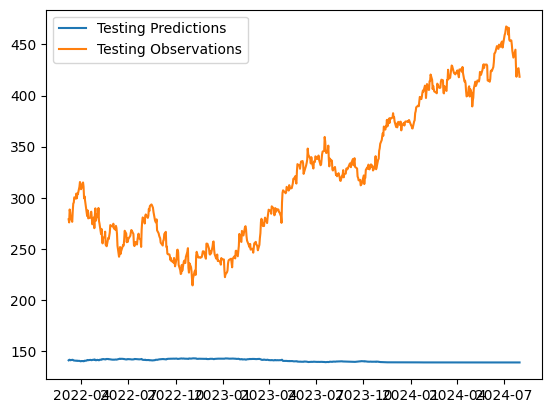

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

Here, again we can see that it works terribly on test data.

Now, let's bring all the plots in a single plot to see what actually happened.

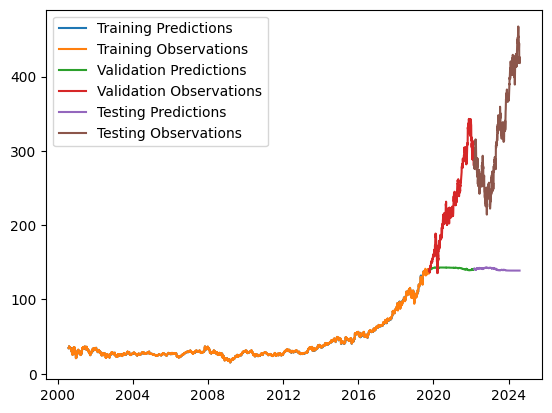

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

We first plot the training predictions and the observations, the validation predictions and the observations same for the test. And then, we create the legend. We see that this picture again for the training it follows it very closely.
And for the red piece, is what actually happened in validation, the green is what it thought happened, which not good at all.
The brown is what really happened and the purple is what it thought for the test which is really really bad.
It turns out that these lstm models are very bad at what we call extrapolating.

To sort this out, we select the time-period of one year. And, for that we just need to change our windowed function, where we will change the value from 2000 to 2023. So our first data will be 1st August 2023. So, let's change the windowed dunction.

In [ ]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2023-08-01'
windowed_df = df_to_windowed_df(df,
                                '2023-08-01',
                                '2024-07-31',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-08-01,330.720001,338.369995,335.920013,336.339996
1,2023-08-02,338.369995,335.920013,336.339996,327.500000
2,2023-08-03,335.920013,336.339996,327.500000,326.660004
3,2023-08-04,336.339996,327.500000,326.660004,327.779999
4,2023-08-07,327.500000,326.660004,327.779999,330.109985
...,...,...,...,...,...
247,2024-07-25,442.940002,444.850006,428.899994,418.399994
248,2024-07-26,444.850006,428.899994,418.399994,425.269989
249,2024-07-29,428.899994,418.399994,425.269989,426.730011
250,2024-07-30,418.399994,425.269989,426.730011,422.920013


We can see that we have now only 252 records which is for 1 year period.

Now we will re run all the codes again for this updarted windowed function.

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

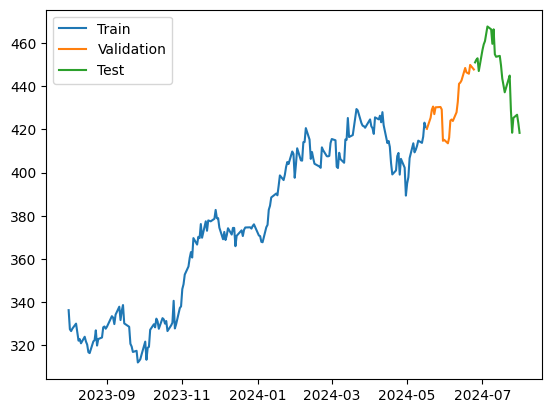

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 140232.8125 - mean_absolute_error: 372.5955 - val_loss: 185447.1562 - val_mean_absolute_error: 430.4915
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 140235.2344 - mean_absolute_error: 372.6374 - val_loss: 184992.1875 - val_mean_absolute_error: 429.9627
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 139656.3438 - mean_absolute_error: 371.8863 - val_loss: 184532.4531 - val_mean_absolute_error: 429.4278
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 139372.8281 - mean_absolute_error: 371.4122 - val_loss: 183954.0156 - val_mean_absolute_error: 428.7538
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 138640.9531 - mean_absolute_error: 370.5530 - val_loss: 183194.5781 - val_mean_absolute_error: 427.8672
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 137439.8750 - mean_absolute_error: 368.8074 - val_loss: 181987.7188 - val_mean_absolute_error: 426.4546
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


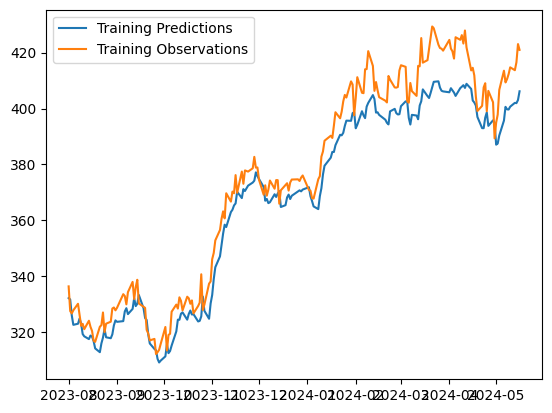

In [ ]:
train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


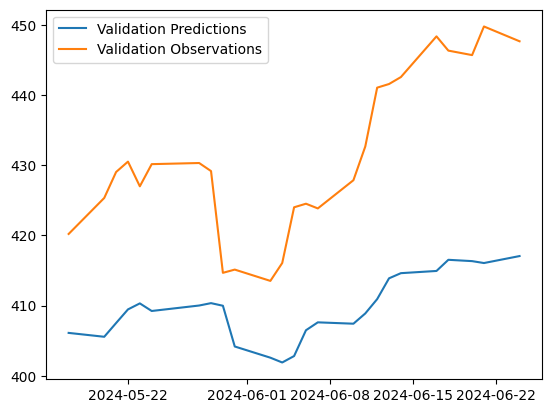

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


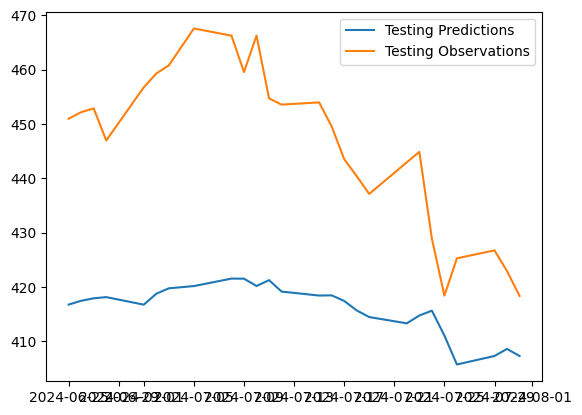

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

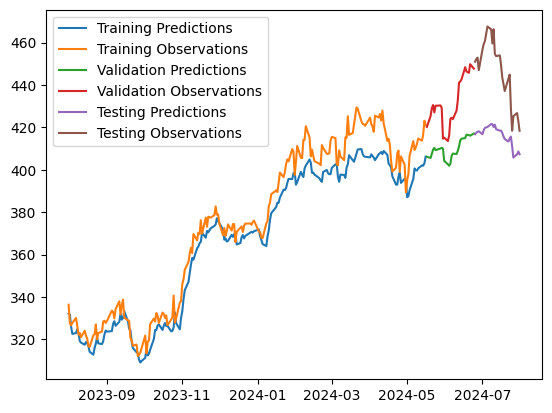

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

We can see here the train it doesn't follow it quite as well as before but that's totally okay. If we see for the validation it got so much better now. These values are extremely close to each other and if we see for the test as well, the tests are also extremely close to each other

# Improving the model

Now, let's try how we can try and predict long term because all of these values of predictions, we're assuming we had the actual three days before and that data was real. Then we used those three days before to make the prediction and then the next day we would have the actual three and then we'd use that to predict the next day.
We will train at few data and then pretend that's all the data that we have and let the model recursively predict the future and see what it has to say.

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

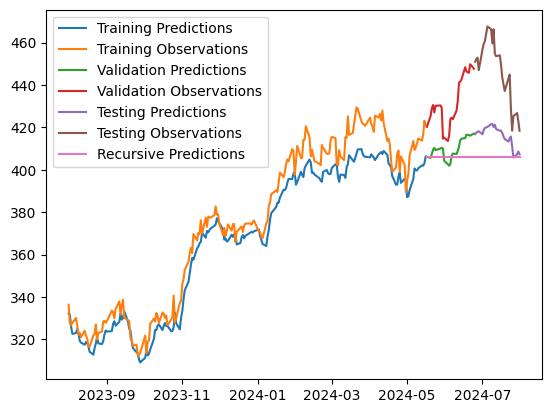

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

This graph right here shows the recursive predictions in pink color. The model has absolutely no idea on how to predict in the future, it just thinks it'll be what it was before and actually that's a reasonable prediction. Predicting stocks is incredibly difficult there is of course the trend we can analyze. We saw before that the graph really started to go up and that would indicate that it's a good stock to buy, but that doesn't guarantee that.